In [4]:
# libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt



# Image derivatives

### A) Compute derivatives

in notebook

### B) gaussdx function

In [5]:
from math import pi, sqrt, exp


# from previous assigment
def gauss(size, sigma):
    kernel = list(map(
        lambda x: 1 / (sqrt(2 * pi) * sigma) * exp(-x ** 2 / (2 * sigma ** 2)),
        range(-size, size + 1)
    ))
    return np.array(kernel) / sum(kernel)


def gaussdx(size, sigma):
    kernel = list(map(
        lambda x: -1 / (sqrt(2 * pi) * sigma ** 3) * x * exp(-x ** 2 / (2 * sigma ** 2)),
        range(-size, size + 1)
    ))
    return np.array(kernel) / np.sum(np.abs(kernel))

### C) impulse response function

we know that convolution is commutative

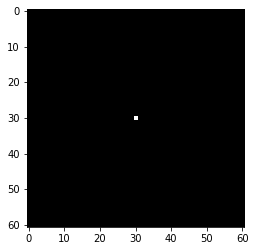

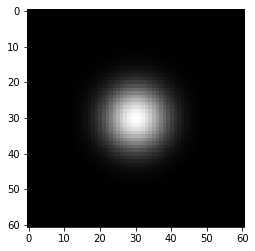

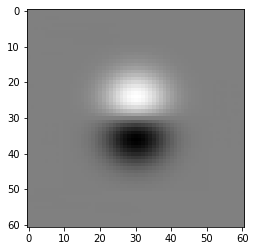

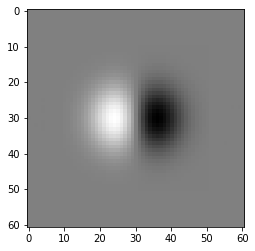

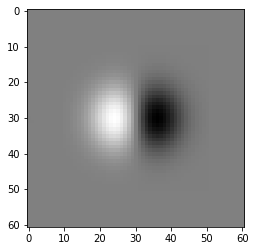

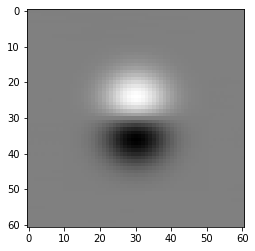

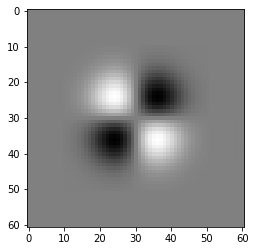

In [13]:
def convert_to_2D(kernel):
    size = (len(kernel) - 1) // 2
    kernel2d = np.zeros((2 * size + 1, 2 * size + 1))
    kernel2d[size, :] = kernel  # kernel should be in the middle row of square matrix
    return kernel2d


def flip(kernel):
    return kernel.reshape(-1)[::-1].reshape((kernel.shape))


def convolve(src, kernel):
    return cv2.filter2D(src, -1, flip(kernel))


def convolve_more_kernels(src, kernels):
    src_copy = np.copy(src)
    for kernel in kernels:
        src_copy = convolve(src_copy, kernel)
    return src_copy


def dirac():
    impulse = np.zeros((61, 61))
    impulse[30, 30] = 255
    return impulse


size = 20
sigma = 6
G = convert_to_2D(gauss(size, sigma))
D = convert_to_2D(gaussdx(size, sigma))
impulse = dirac()

con_GGt = convolve_more_kernels(impulse, [G, G.T])
con_GDt = convolve_more_kernels(impulse, [G, D.T])
con_DGt = convolve_more_kernels(impulse, [D, G.T])
con_GtD = convolve_more_kernels(impulse, [G.T, D])
con_DtG = convolve_more_kernels(impulse, [D.T, G])
# extra
con_DDt = convolve_more_kernels(impulse, [D, D.T])


def show_images(images):
    for im in images:
        plt.imshow(im, cmap='gray')
        plt.show()


show_images([impulse, con_GGt, con_GDt, con_DGt, con_GtD, con_DtG, con_DDt])

### D) derivatives of images

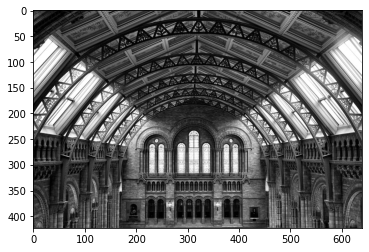

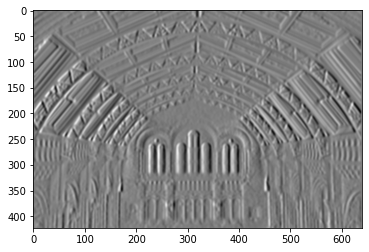

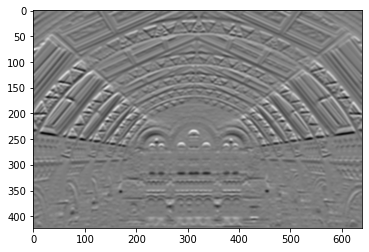

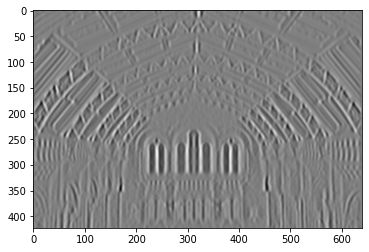

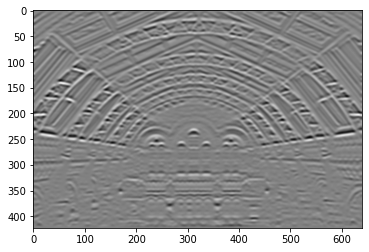

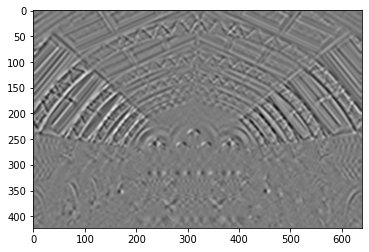

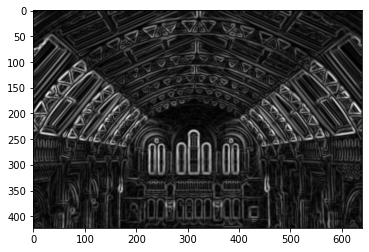

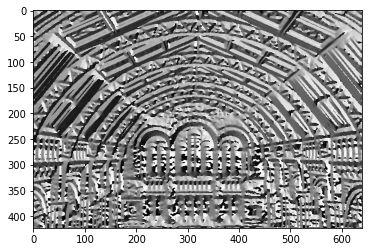

In [14]:
SIGMA = 2
KERNEL_SIZE = 4


def get_image_derivatives(I, size, sigma):
    G = convert_to_2D(gauss(size, sigma))
    D = convert_to_2D(gaussdx(size, sigma))
    Ix = convolve_more_kernels(I, [G.T, D])
    Iy = convolve_more_kernels(I, [D.T, G])
    return Ix, Iy


def get_image_2nd_derivatives(I, size, sigma):
    G = convert_to_2D(gauss(size, sigma))
    D = convert_to_2D(gaussdx(size, sigma))
    Ix, Iy = get_image_derivatives(I, size, sigma)
    Ixx = convolve_more_kernels(Ix, [D, G.T])
    Iyy = convolve_more_kernels(Iy, [D.T, G])
    Ixy = convolve_more_kernels(Ix, [D.T, G])
    return Ixx, Iyy, Ixy


def gradient_magnitude(Ix, Iy):
    magnitude = np.sqrt(Ix ** 2 + Iy ** 2)
    gradient = np.arctan2(Iy, Ix)
    return magnitude, gradient


I = cv2.imread('images/museum.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = I.astype(float)

Ix, Iy = get_image_derivatives(I, KERNEL_SIZE, SIGMA)
Ixx, Iyy, Ixy = get_image_2nd_derivatives(I, KERNEL_SIZE, SIGMA)
mag, dir = gradient_magnitude(Ix, Iy)

show_images([I, Ix, Iy, Ixx, Iyy, Ixy, mag, dir])